In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #all last

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from importlib import reload
plt=reload(plt)
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import datetime
import seaborn as sns
from scipy import sparse
# import mglearn

#Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2
import matplotlib.ticker as ticker

import imp
import Library.Rawdata_stack as rawstack
imp.reload(rawstack)

<module 'Library.Rawdata_stack' from 'F:\\my_documnet_F\\ml\\Library\\Rawdata_stack.py'>

In [4]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

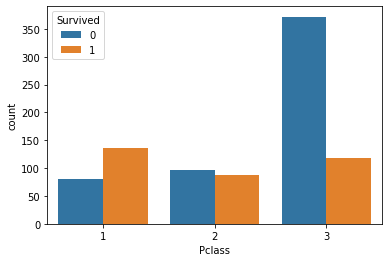

In [9]:
sns.countplot(data = titanic_train, x = 'Pclass', hue = 'Survived')

In [11]:
feature_name = ['Pclass']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]
print(x.head())
print(y.head())

   Pclass
0       3
1       1
2       3
3       1
4       3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

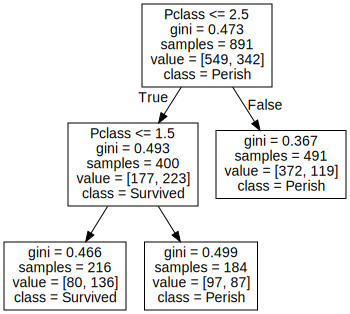

In [17]:
import graphviz
from sklearn.tree import export_graphviz

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'

tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

In [22]:
x_test = titanic_test[feature_name]
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

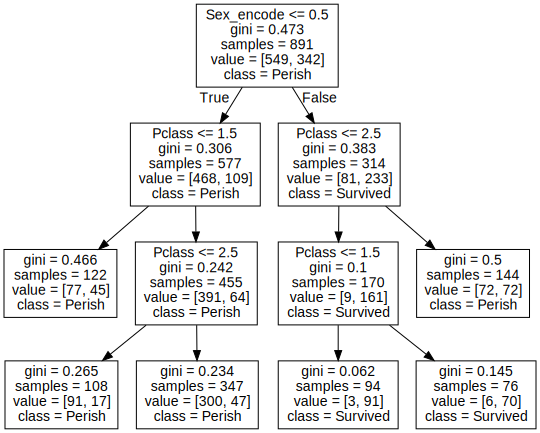

In [33]:
titanic_test['Sex_encode'] = titanic_test['Sex'].map({'male': 0, 'female':1})
titanic_train['Sex_encode'] = titanic_train['Sex'].map({'male': 0, 'female':1})

feature_name = ['Pclass', 'Sex_encode']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]

model.fit(x, y)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

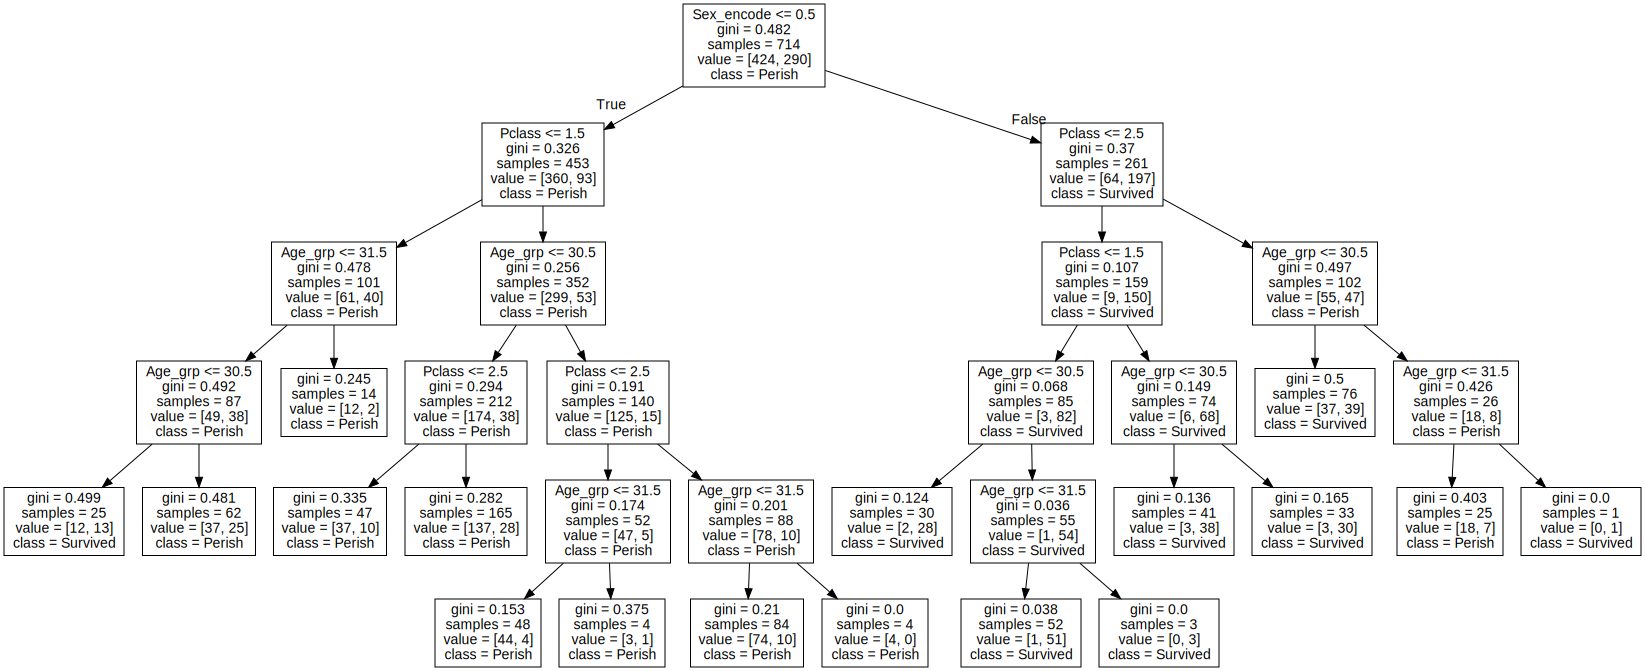

In [45]:
titanic_test = titanic_test[~titanic_test['Age'].isna()]
titanic_train = titanic_train[~titanic_train['Age'].isna()]
titanic_test['Age_grp'] = (titanic_train['Age'] / 30).astype(int) + 30
titanic_train['Age_grp'] = (titanic_train['Age'] / 30).astype(int) + 30

feature_name = ['Pclass', 'Sex_encode', 'Age_grp']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]

model.fit(x, y)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

F:\my_documnet_F\ml\Library\Rawdata_stack.py:88: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


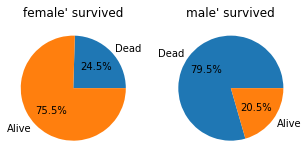

In [53]:
c = rawstack.show_pie_chart(titanic_train, 'Sex')

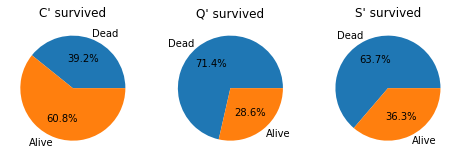

In [54]:
c = rawstack.show_pie_chart(titanic_train, 'Embarked')

In [55]:
titanic_train['Title'] = titanic_train.Name.str.extract(' ([A-Za-z]+)\.')
titanic_train['Title'].value_counts()

Mr          398
Miss        146
Mrs         108
Master       36
Rev           6
Dr            6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [57]:
ltitle = ['Mr', 'Miss', 'Mrs', 'Master', 'Other']
titanic_train['Title'] = np.where(titanic_train['Title'].isin(ltitle), titanic_train['Title'], 'Other')

F:\my_documnet_F\ml\Library\Rawdata_stack.py:88: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


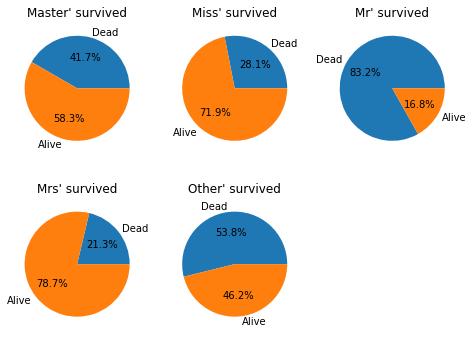

In [59]:
c = rawstack.show_pie_chart(titanic_train, 'Title')